<a href="https://colab.research.google.com/github/Hagar-Usama/PortraitMoi/blob/main/PortraitMoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pandas as pd
from skimage.exposure import rescale_intensity
from google.colab.patches import cv2_imshow
#for convolution
from scipy import ndimage 

In [ ]:
#fuction which converts url to image
def url_to_img(url):
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image
  

In [ ]:
image = url_to_img("https://www.google.com/imgres?imgurl=https%3A%2F%2Fakm-img-a-in.tosshub.com%2Findiatoday%2Fimages%2Fstory%2F201807%2FJr_NTR_0.jpeg%3FvqsvdJIp3Cy6NrpbFitP89yjW0Dxcq6q&imgrefurl=https%3A%2F%2Fwww.indiatoday.in%2Fmovies%2Fregional-cinema%2Fstory%2Fjr-ntr-is-not-a-part-of-his-grandfather-ntr-biopic-1286386-2018-07-15&docid=yNN35q8qrCW9OM&tbnid=UGIoktw7fj7b9M%3A&vet=10ahUKEwjswd6pvbHiAhXae30KHZhDCjYQMwhSKAEwAQ..i&w=647&h=363&bih=695&biw=1366&q=jr%20ntr&ved=0ahUKEwjswd6pvbHiAhXae30KHZhDCjYQMwhSKAEwAQ&iact=mrc&uact=8")
image = url_to_img("https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRtJGCO6tTsDqCiz3wygan4VRUGeSh4TFDQWg&usqp=CAU")
image = url_to_img("https://media-exp1.licdn.com/dms/image/C4D03AQEN39EIMBX2qw/profile-displayphoto-shrink_400_400/0?e=1609977600&v=beta&t=7NBSXNC-QUSI7r0Yu-UdYtmag3U0Ov2-b7hSpv_q0-I&fbclid=IwAR3s8_RxvQDpsxxx-CokNlxhTIkDJmGP1pxw9DwOI_r3JcngFyZaLvrvZ_8")
image = url_to_img("https://www.linuxjournal.com/sites/default/files/styles/max_650x650/public/u%5Buid%5D/linus-small.jpeg")
image = url_to_img("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASEhUSEhIWFhUVFxcVFRUVFRYXFRUVFRUWFxUWFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0lHR0tLS0tLS0tLS0tLS0rLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUGBwj/xABAEAABAgMGBAIHBQcEAwEAAAABAAIDBBEFEiExQVEGYXGBIpEHEzJCobHRUnLB4fAUIzNDYoLxFZKishdTgxb/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQMCBAX/xAAkEQEBAAICAgICAgMAAAAAAAAAAQIRAzESIQRBE1FhcSIygf/aAAwDAQACEQMRAD8A7G5r1HeXKS6I7ZR3xDsqpEsea5KfAeoDH4qfAcEqIkJma9lPJma9lTUUM7moRCnTgxUMhSy7bnRJC0tlN/dhZ66tLINpDb0Tw7KpCCrLWtyBLisR4wxIGe3YVIz3WP4n9I8NkINlv4j/AHjSkMZV5mq3cpCbO07al5f+LFa07Vq7rdGKoIvpCkQcC93Ro/ErilpWjEiOLnOLjTMkkkk5k66puC8gUBx1O2GPbJTudb8XaW+kKWP8uJTldr5Eq2kOL5OLhfLDtEF345LgUO0TXwj+4ip/XJW8paFRRzhXp8zQBYvJlDmEegWPa4VBBByIxB7pqIAuJy1vTcuf3cVwbsDVpPQ6+S11g+kFrqNmW009YAcTzH0W8PkY3v0xlxZRugMVKhhQZWOyIA5jg4HUGqnMCvb6ThabjZJxIi5LLajmk2U7NBNFTvZwGJYSGJYRiKU1OhNtTjVsikaJGgkgzB2TESMNlIMdqjxIjVZMljxVT4Lgq9lKqwgAJURITUz7KdTUxkpqqKczUUjFS5vNRw3FSy7anQnFoFSaAaqktfjRrGlgxpgAHUAGl+hBceVQOqr+MrfENpY00AwOpJGi5TaFrOcSf19FO5Xeo1Md9r637f8AWVxGuLWgHxZ1IxOZGJOCy7YzicCTpyomoDYkZ4a3Elbyw+FGsaC8Vcc+Sf8Ar2pjhtmWQSaEg5I/VG7Tc49Nvgt/EsFpFAO+qR/+dbnp/hLbf43Pi5432A0A6fBSpK0SMHG8NQW4DfGq2kfhtpBoFQWjw1QG7th1qEblH46sJeEyKy8w1GVCag8qnLkDhzVbGc5rqHHY1uuoOe/IqvsWLGlYtHCsN2Dhp1AWgtmDWjswQCDqQcvmO55qHJjoQ7YduxoL6wnlp1Y4Va4bEfj8l1jhfiOHNtpS5Fb7cOte7TqFwqI5pzz+0MD3pspchaUSA5rg+jmmrXA4jmDqNwe6fHy3D+mM+OV6ISYmSqeFrbbNwBEqLw8LwNHDkdDmrZ+S7pdzcc9Uk2min5tMlZvZwlqWEhqWEYiltTjU21OBaIpGiQQSY57FGiBqkuhsUaJCarRM21oqrCA0KvEPFT4DEqIkpqYyKdTcfIqaqjm1WWlONhMLiQCcG13VnNrnfpDtJzXhgGAb5l2yjndNYxheKbSdFiFrch+s1QQ4BcaNFSe6sXsvO31poOZWp4Rse+6+4VAyGizPUWk2n8K8PiE0OcPGcSdhstXDhUTsKCPipDISWtrTUMtYlXFJaxKuUT8T2huhYKJMS3JW7mKPEAKzcWpWPtWya40VU57rhYcxgK5dDyNadyt5HggrN23ZlQS0Y0U8utUXHbHxnDPQ+YI/EKMJgkUOY8q9NvqlTFTUH2gcjr/n9ZKFliNtc8N+Y+ixIlY3fo04gMtMhrnfuovgdU+yfdPYnyK7i7JeXLIj3nEVpzypsfmvTsmCITA41NxtTuaCpXTwW+45+Wfatm0yU/NpgqtYhLUsJLUpGIpTU41NhOBaIpGiRoJKdAG6jRIPNSHS53UeJCdurJmww7qfLtKgBrlPlwUURKCbj5FOBNx8ipKqSbXPPSHBF4HcY4fCpXQ5tY3j6XBhtfSrsgNhqVLNrFy+HBxpuct9qro3DUMBgWBYfHnrny3XRrBhUhg7rH26MVxDanWtSGpbc1qRooFKKINRkLQNRK4UKbFcSlvyTTRULFbhl7uaiRfEKFS40KuqiRoWyhkpGZtmxQ43mqtj8Ol7S4YPbmNHD/C2LwkkCh5hROyOVQoHq4poc6gr0bwPOGLIwXHMNuH+w3fkAuA2gz984c13rgGU9VIwh9oF/wDuK6eC25b/AIcXNNJc2o7lIm1HcuiowTUoJDUsIxFKanAm2pwLRFI0SNBJTmP3UeIHJ9xeo8RztlZM2Lyny5Krw87KfLuKKIlhNxsksJEbJSUUs2srx20fspd7wOFM8c1qpxUvEMuIkvEacqV2yUsu28XG5XF7a6/ryXUrNoGDouXxIgbEBGlMBmMcMOxXS7Nigw2kHMBYjoxWZePJVkxxBCaaVy10UK1IrnuuB1G8vx+iopuzofvRfFs0EmnIBG79NNJMcXQWitCelFIkuJIUbLA881zubkGNNfWRQObMPyUyzXQ2kAOrXI4g9vyWfLJrGR0l0SqEF4DTyJVZIRr10DHBRp+f9VfBOeIRc9e2pNp0zPMFQXAdSov+owjhfHmsRPzT4tS3zJoFVNiRwSAWdbwKnd1q+nSzHY7BrgSmr5yWKkIsUD2hXcHVaOyZpz8H5j9YqN7a2z0OTMWfEIYX4gaO555r0PLwQxjWCnhaBhlgNFxHgyX9ZazDo2I41+6HED4ZdV3Ny7eCf47cHNf8lRNqOU/NpgqlThLUsJDUsIxFKanGpsJxq0RSNEggkx8R2yjxIp2Uh0xyTESKNlWJ0x6zkp0u9Qb4qp0s8J0RKCTGyKUEmLkVJVSTay/GM7FhQ4YhAEvfQ3sRQCtKc6rVTSz/ABBAvmCNnlx6Bv1oo8kW4NeU2xdv2PecHsaBVzQ8DMV23zV1EsVhoWEsdQCrTStNxke6kTUwwxQwZkEk08OBGFdT9FNgHFZ9L2MrOS0yzBwDmmjWvBDXNLiG1IukHE5YKNC4fJD2vecQaUNBfORdTF35LZ2jBJZWlbpa+mpuODiBzIBHdNOl2OxBwONRkRuieqXcYCzuHHNikxBdbyNK0rjUHE5bDDfORL2GSSKgCp6YHCo35jZaubgQm+8Sdh+SYEi+49w8BLSGciRQGnWhRl7p4Txno3Y056uIYN1z3NAdmPZdW7UnM1a4dqnNUvGUw69Uw3NBwGLTiSAMjzVvwTZBhQ3PiOvPeahxzLQTQ9yS7um+O5W9CFBi03vIg/h8FPkUwjNiynlzWOdRuZdQ3e1M1VRbNj+sDPEKZmoIOOdKXQKLUWWHGCwvdXAeIb0Ur9jccnV6khamep0zcPK96Y6JKRYb9xXMYAjpoeYVrJTjmPDbryTQ+FriKE0BcQKNyOeyv4UgTUOoa90Gy4a6I4DK6zu0Emnd9OxXPld1X+Fn6Onshzr4Ya0GJfxxLjdq4vJ64AbUXVHLlfB8of8AUoUQD3Iod/tw/wCx8l1Ry6/j23H/AK4/k4zHKa/Snm1HKkTijlUvaEJaUsJtqcCUFKanGpsJxq2RaCCCCT3xGqPEe1SXlqYfdVYxUUkKbLEKI4NUuWARSiWFAtW04MFtYj2trgKkDFSpgkNJbnQ0Xne3Z+PHjOMckuDiLpybQ5ALj+Rz/ikuu27fp2qJNMeKscD0VTaVbvMhwHkD+C53w3bzpd9MXAj2dltbOnYkw1znNoBi3tn+B7KPH8mcn17V4r7iNBgC4ImZ+RqAfxCmwkJ+CKB2RFMBkanUfFIlzVW1p127T2vNAob5V7allC3VhNKfcdjT7pHcJ5r0sxgK7LQiB+1MbiYESv8A8z8byYmnPj0Dhche8K+J4+ySMANwM90qctQA0aKn4lEyNXGJ4TTVT39N6ToDwodvMqyuyTBtODWgcDTOhBooFt8QQgCKinPRLk14nh2rrNJYSALzKnw4VFccK5jl88lLrD0c4cix9fkq6NPMBa+Gah2DqdqFW0vFBC55arcTf7UQKMaR/W4Up0acSeuHXJJdEFLgyA754knU1NVLiMFMFAaMSUsqWon8AzpM9d0vOH/FwXWnLlfBNnUm4d3UvivPOjgB0qV1Ry6/i/63+3H8vXnNfpTTijlPzijlWvbmhLU4E21OBKHSgnWpoJ1q2zS0EEEyWD4TVHfCan3QRumHwuapGKYcwBSYF2maqbXk4j2EQ33XaFc9tFtqwXZvcN2GvwUebm/H9W/0y7AHUzyXPfSHwWYp/aZYC8f4jcr39Q5qBYPG8zCcGzLHlmpLCHDnliugPnGRYN+C4ODhhQ5jXupW8fPjptzWyOG2MpexPvO3P0V3GtqDAoxuJGgTPEUYshhkPCoxdsFj4USrrkMF7zr9ToufKTjup6Py/TZvnhFBugmugzbyI2G+SbhOofgp3DFh+qF95q458uQUObbdiFvP8j8lbG5WbyjpwztnscQu0TMUnIlSITqZ/rNQ7RBzArphunYtKOXcxpq1oruc+yh21AbGFD81EgzxaaRGuYK0DnCoPQjLuprJyA7+czzHyTmj9s4bMZBq4Qw2vvAYk6KjmZMxDShNDWv+Vt52A2JQMeCNaHBV0aVa2gvN8wsZ6bx2h2XKtY2lK0orRlBlgq2ZmAwEkjDY4BNyMwXuBBwUNfpXdXb5miZ9bvzKaiuFeituDrPbMzIY9t5gDnPGNCAKCtP6i1ZmPldM5ZSTdar0cQQWPiUxFIYdy9pwHenwWycm5aXZDaGQ2hrRgGtAAHQBOOXocePjjI87kz88rkpZ1RypM6oxSy7ZhDU4E21OBEOlhOtTQTrVuM0pGiQTJPfCO6YfCO6kPa7dR3hypGKobbtKLAxuFw/pxoqBnHzQaPhnvmtnFDTgaFHCseA7EsaewU88c77xy1/xnSpszjGRi+FxDSdHCg88leRZaC6GfV3RUVBbhjvgpDbNgj+W3yCN8ky6Q1oHTBKb+25K5XGsyamHFrnUY1xaXakA6bBWklLy8tRrGgu+JPMqZD9ZfiQhkD7WqzfpDd+ySZLD44rvV3tQCCTQ9BTuuacc8mpv6RuIvSjBliWQmeveM/FdhtI0vDF3bzU+cnSXiIfexNMgXUXCJnVdpl3B8MD+kfD9BVzml+KdrlkUECifwoFT2bMZsOY+IVnDzpXyWFqcmpcObp+CpJmRhH22Nd2x7FaNg8kxNWc14+SNNY5aZKLZ8vXwlzKbO81AmLLl93n+/wCavJ/h/OhFO9VD/wBGI1JptVTz9L457VUrY0CoABOpvEu+JV1BhMZkAKZeSOFJFtTRMR8lCZDL2TEeM+q6N6MpJggvjXmufEddIBBLGsya6mRJJNNi1ctLiaDzWZg8SzUjPxY0tELTf8TDjDiNAHhe3X5jQq3x9eSHyd+Pp6rRFZzgbjGBacD1kPwxG0EWCTV0NxyPNpoaO1odQQtGV2uFTzoUUqZOhRCsZdnDbU4E21OBKHSwnWpoJxq1GaWgiRrRLCI52yixbxUuLEI0Ud0Q7KkYqim7Ie41ERw6FS5CQmG/za9QpxcVKlyUrPtmQIPrB7VD0Tzn4YpVVm+MuLZaRgl73BzqgCG1wvmpxoFntTpAjTTGRIhJxXO/SnaYiy7W4AiIHAVFaXXAmndY+3+MpmYe4hxhtJJDWmhps5wzWbdHJOJJrnXFYmF3s/ZuI2uC6fw9OXobOg8xgVzFziMVq+Ep/Cn6qs8v7dPD9xs5682kRuYz5hFKWy0kA4dVJg0e1UM/KXHVphn0U1bGwlLQB151/JT2zYIxK55CmXN9l2OxwTruIHj2gQeiNlG2mZphwrjvsq6ammt1WRicRjGlVDfbN41J7aqee6rjqNdNWgAM8lRx7TBKqI0y9+eA21TkpCqaqGU03PdWAialYKYdeivdu93/AGK281g0rFyjL2O5+ZVfjT3an8q6kiz4dtyPZ8wyZgHFuDmn2YjCfEx3I0z0NDovT3DFuwZ6WhzMGt14xafaY4GjmOpqCCvKNpuutA1K1/os9IMWRiMlnNa+XjRW3hiHw3RC1l9hrSmAJbTHcLucFd+nRmoblMnHA5FRCsXsQ21LCQ0JwJQ6UE41NhOtWmaUgggtEsYkUKJFjHQKa9wCzvEvFcpJMvRXiujBQvJ+6txipcWccM2qjtj0iSUpUPdeePcZi6u3Jck4w9I8zNm7D/dQwcAD4j1KwsWMSakkk5k5o2cxro/E/pZnJgOZA/cwzhUGryPve72XPJuae83nuLjqXEk+ZTF5E4pNSAXJBKKqBQZ6YaLrDq69XtdAHz81Y8PvoO6rHmsMf0uI7PFR8WHzRyUw5hq3POmhpmPL5KfJjcsdKceXjlt1qx4xIFc/1irWZlw8LJcKWvCjAAGjwMWE49RuFr4Dq/RQm56rq3L7jOTdmYlVczLxW6XgtzGg1VdGluSKTERPWfYPkm2wXnRa+YYwaYqCYFTgpZXSuKngyziaVVxAlQ0KVJygGidmMB+sFKzakulLbLrrCsvZLQWVpXPZSOKbWBrDYa/aO3LqnbHhgQWk6iv4rs+Ph4zd+3F8jOZXU+lNbebeh/AKFLZ15H5YJdpTAiRCR7OQrtv3NSmhgOuHYfoeSvXPF3ZHFM7KurCjPFPdJLmnldK6VYPpbhOAbNQy06vZ4mnnTMLjLilscs6N6dsy35WOKwozHV0DhXyVq14OS8pQJhzSC1xBGoNCO4WlsfjqelyKRS9o91/iHnmlrQejGpxq5ZYnpXhuIEeGWZYjFv5LoVlWzAjgGFEa6uxByz+ae2as6IIVQWicw409LRN6HJCgyMV4xP3G6dT5Lkc7NPiOL3uLnONS5xqSeqaiPTDnLQ0NxSSheRJGSgCjKbTA3IqpQSCgHpY1Jb9oU/urVvxAHQlMA0NUKp2Y8Xj+17XJ+vnn3OyVBNSxwLSR7zSCQR0I1GS1li8eRodBGb61o94eGJ9HfBZAuRBLUvbUys6dos7i+QjD+MGO+zF8B8zgexU6O4EXmkHm0ghcKqlQ4pb7JLfukj5LN443OWuuRiXGlE7ClgPaIC5IJ+N/7Yn+931TUSO53tOc77zifmp/g39t/n/h1W0+IZSXFDEDnfZZ4j8MB3WGtnieLGqGeBvXxHvp2WfqhRax4cYxlzZUTitBac4IcFsNpxc0CoOTdfj+Kz9EYVUgaERfU9EqIaYa6/RIhhZMt+iNqJ+aNAAFLJSAhVMH2uU6yLZjy7w+C8tI2yPUKsccEbSs6N0P/wApz32Wf8vqgufX0Ei1BucgCkkpKoRdNkQKIFApgZSSgCgQkBBGQkuRtKYJSob6VB9k5/gR0+qJyJIDiQ6HHqNiNCDsiaja8jClQdD8xsUtvqz7xbycLw8xj8EAmiFFIbKOPsUfhXwGp19w0dptgmAUAm6ionESASGoyEadZDAF92XutxF8jPo0akdBjiDYNsg1F44Nyqd9gNSkGIBg3P7Rz7AZfNJjxnPOJ5aAAbADADkiAosmKiW1JSmpgHZoFA5oFAGCiagUGoAE6JaQ1HVAKqNkEi8jSM4UkoVQK0ySlAoik1omCnIIJLSkBhEDigUT0AspKMFEUAEhzUuqJAIa6nbI6jupn7Ve/ieL+v3x1+2ORx5hRCEWSQSntIND1BGRByI5JBS5c3hc19zr9nv8+6bqiGUwA55DEkZ05czkOqbmYpca9gNgMA0cglxXUFO560wHYH4phqANoRko0lBDCUEQQCYByBQejSMTskCcETijcggGSUiQBQB1CCRe5IJbM4UAggtsjSSjQSMQySdSjQTAOROQQSoHDyRFBBFAIygggEBEUEEgXCz8k/OfxIn33/8AYoIInZ/RqZzPUpDUEEoAKIIIJkMo0EEwD0EEEjJKM5hBBEBRRBBBFIygggsm/9k=")
image = url_to_img("https://images.theconversation.com/files/350865/original/file-20200803-24-50u91u.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=675.0&fit=crop")
image = url_to_img("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExIVFRUWFxUVGBgYGBUVGBUYFxcWFxUVFRcYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQFy0dHR0tLS0tLS0rLS0tLS0tLS0tKy0tLS0tLS0tLS0rLSstKy0tKy0rLS0tLi0tLS0rLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAADAAIEBQEGBwj/xAA6EAABAwIEAwYEBQQDAAMBAAABAAIRAyEEEjFBBVFhBhMicYGRB6Gx8BQyQsHRI1Lh8WJyklOCwiT/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/8QAIhEBAQACAgICAwEBAAAAAAAAAAECEQMhEjEiQQQTUXFh/9oADAMBAAIRAxEAPwDRH1TkaGwIs65hRm4km9iwa8/Mfe6lGoIvptKg4uhr3cRMkm08x1S0GXVc5BIDRtHqhMYQZ22jQ+qj0aZE3sAJnbyUx1RjGhodzcJuTH0QaSwMjxH6KAyCSb/fNNDw27hIOkaqS5zRAbyvGpPIpA51MOuDpa/NJ9OB+YOkgEQorQ+50vP+AiUXSMxuRyTAjKgaYi557LFOtYidfkh1jmMtMyJPRMp1wLWKAOA6LOJDuY/dMw9Co78rZyoxx4EXiNlL7O1Q9zwOc+4P8KMstTascd3Su4pVLABBadYiP9qvrVXQJOq6HT4WyqzI9uYco+h2Pldanxvs4/DlxALqfP8AUwf8hy6+/Wcc99VWWGvSkoViHSDrr1SxNEgyBY3T/wAPuLo1OrAgi261ZotNyN5J5wbTdrvdM7tzTB/2mBmVARBUHFNgwNFuPZzswX+Oq3wi+XT3/gKd2g4bQcA0UmtjQtEH15rK8uMrScWVc7BTZRKguQNASkaRiYWjNGeE1qMWpUcK5xgBMBysscjV8G5pghAhAPJWarrJsJhaSgC0XDQo9Ojfoo7KKnUXWgqacPsFmhiC02QnTdYhGpYVizp4nNZTaLbKjDSYyi6t8K2rZuWSuXl49emeWOjzTST3FwMFt0ljqpRRUEDNveIuAYWAABMkifOyBSql20GIM6Rt6aLOCxOrXAu8Wg3GhuvRaiCtH5myD+rkDohvZmk72a3+UWrNQEgQxpiBbe3rCjYthafCCLXPO9kGwWeOMoMjU7dUVn9MghwMmARfzTX1W2InMBcjkeaBRc4DM0T57dQkEwvJfNiLg9VHxVRtsrSOd7JuFqCHXIcBIHModWtJI9fNASKbmtBnXooYdzTmkutyv0SLRqgCU6A1NxyVvwHENp12Ws638fv7qnNQTb5otOBBvISs3NHjdXbqdDBBzrGBrcxA6o2OYC0d27M5vKXTsQZFwoHDnOqUqeQh2cNvc66iTsLj0W78E4JkaALmxJ1J+x8wsMZb06c7J259gOyNEsq4qu2rRpiC2mwtAqH9TQ5wJY20zsD0WvYqvh8zHNwLckB7g6rWeS2QCCQWi87Bd4xPAGVwGP8AyzoNDe48lS9sOxWHpYN3dM8WZoLj4nZS6XeZElby2Rz3VrmHEeK4Nwy0uE0aYt4hUq5rSJlrhfXa8XTMPUpHI2nRY1xdOcy9zOgcenIC/OE3C4QfqJaKhzN0ktb+U9bA66FyucBSpghr2joddLEA+cXWPJyXWm3Hxza5oUfBlplltrT7rXuLjIHE3cAbeV481YcVoFkVGGDJGo05GPu6qO0GOaynTeWmCSCQHZJi1zaSNvJZYzysjbLWMtc/awgkEXWBRfzgKzqFsy0arD2W5ru04NgUcHuRMI1IDQ2nknAQIN5QKjroCUyq0TvsolbBtN4hY6o7KsgNKAhVMIEF+EcFYuZ1WMyeggsbGqdUUomdU2pSBEDVLQ2dhRaCNdCo7xBhPqVHQ0Ros424BCmbi7q+haGMLB4QPNScPxN+aT8lSCoUWm5w/KUssMb7Z2Nm74G97pLXRVfzKSy/T/1PidldNnWPX10R+F1g05oEiR5zuVDeTaT97LNB5ubDY/VbrWzMN4ZbbMZN5Ai9gmVKwcIMAmR1HPyUHBYtzDzFyR84CmPax1/1kE3sEGjta6+USdBF/VMLjlFiSDfb3RaboNjHIhNdYi4OuaNEgTZDi8+IiBAPyKG45jIEdNYUr8rAWAX1m58/qgMLc0uaeQjQnmUAyCLHVEa4D8zfJJoIm3pqiUgBqR05yeSAF3e8+SIB7nVSi5sQREaE79EGpWG1+sIDqXwn4fmoVC+DlqkN6S1hN/b5rodXiNOhYm8TESY5wNlzP4R8W8FTDnn3rdLzAcOugW/cUwT6gbVpjMQ1zHNsCQYuCd5as+S3GbkXh3dVKwPaqlUPgdMTIIINrSJ2lXeLaK9ItIkGD6i4XNhg6zH0j3Tw1jySX6kOzEtEbS4n0XQ+FOPd/RZ4Z5ZTdaZYSOR8Z4dLqJyw2kXBxNvCBoSdTIHuVBwmHD3uDXM8ZsARcidp89FsXaHiX/8AeKZpudSptl8Mc6HvJhzgBoI+Z5KuxjqRp90IfNXvHVMsNY0PL7uOrohoAvptKxuVl1Y1k/itFR4s78glu/yHMX9iuk9jeGUsZwzuMRTa9ueoDIFjMhzeREj2XKsVhCHuqUu8dTBEszOdmB1ygnUGF1r4cVIw293EiRHIaHyWuHV2jk7mnDO3fYrEcNrEFrn0TdlUDwn/AInk4clrlPEE6r2LiKNOqwsqMa9jhBa4AgjyK0Pivwd4fUzGm19Jx0hxc0H/AKn+V1S7cvp55NQwmVXzErqeN+CWMYXGliKVVuwILHHzmwWn8a7HYzDAmth3tA1cAXN/9NkeuiY210vsBCdUJaUUkATEqNUElAPpVZN0Z7xsoLQi0qkG6APCy1KxScEweHJOuNECU9ryggH4UzZRiC0qwzrFQA7JGhd8so/dN5JJeELUCqQQBO86aSssfILeo6oVQ7Tp80NlrgoNLfYxbnI+9UfCvAMkmRMqHmnSROvQ7+iWS8n/AGgLarTmCB6i89ZQqtMWPPb6JlOrbKPQbX0RXVGZrggxJt+XzSMNlUyWlwgGPLXRBcZ00nRSarQYgdSf7hsU4yyDlsZQAe5dIcL3ud0SvS31v9wjvAyAmASbQfqooa4QDfa59kA11Zx1J5+SbnssEQTy0/0ssHS5tb+EwsuzPEvw2IZVmYN76g2PyJXduz3HWuLS1wcx9wQVwBmEbbO+OYF3eZ2aOt1tnY7jjKFVgbmNMkz0O7mz+Yc5jz0CVgd1xtemGFxiAJPlutWw/b7DW/NEkTBFv7hzCI/jTMsmCCN4grm1PBUK2OqUm1gKMZ8g/NJN2SD+Xfnf1WWVv024/H7dv4YKNYd8yPGBcaGyLjcHSIyuYD53VPwBtOgwMYbWtoBaABHkpWJxoc6xt0KjfR2d+2aHA6Lcxyi4IvtKWEYGQxogJjcRO9kmC5dzt9FG++jXOHqqYx6q6JUplRb41llE4OSc0EQRIO2qiioid4tJUaav2i+HGAxck0u6ef10/CfVv5T7LlHbT4T4nDnNhWOxFPciM46FmvqJ9F3/ALxIVVaXjvFYR9M5X03McNQ5pafOCgaXlete0PZfCY1sYig152cPC8eTxf00XHe2Pwar0s1TBu7+nc92bVGjW21T0g9ErDlcxpXRmmFErUqlNxa9rmOBghwLSCNQQbg3Hum5ygJ8hYLlBkpxroBPqwUJ+ITKhkp1PDudoEA8YopLP4F/JJAAi0bogbI8kObjcJElIDZrAzJ08ljvDPQ80Nj46j7un5x5BAGoVsvhceRHzi+2qP8AimlxLrERfnzBVdY+imtcXZSSI1AgajmgLKncFws0W+/RRaslovp+6Ng5ewwQNjy1lAqEAw12bnyQY9F8iDHS0W3QwGgEk394lPbWHpaJ25ob6gggQQ60FACqum0iAAZRaVYAAjXQnfyUao64JESIhEDNSTtYD7sghabsxMAActJ6uPLqpmDqhtpuYLjpAiWtbyGUOdHJon80CsaZufyi+Xm79Idz/gGIUnAPOcEkzdxPMuIZfrdx9UG2HCdo3MrFlSHUbhzTcQ0kAt5GAFuA7P4cxWptBDgCHCNDpcLkb3c12L4XnvMEQR+SoQN9YOqm47G9LDCOqCAJIH3r7q6w9En833/lGp4cDZS2MWNxaSsRAhEDoHsmPF/JYc7RLR7T6NRSmuUHD6KVSVyJtTGuTi9BYVio5aRFGD04PUMVERlVXEpjXIgUZrkZjlRK7j3ZrCY1uXE0GVIkBxHibOuVwu3b2C5X2l+B5lz8FXEST3VTYcmv99RyXaUgVJvInF+AVcO7JWY+m/k4RPUcx1VWaJ5L19xzgeHxbO7xNJlQXgkDMyd2O1afJefu3vw7rcOcarHGrhjo/wDUz/jVAEDo7Q9EG0WlhzN1Iz8rJneHyQX+aAnhw5lYUPMeaSAiaeiaTOqzrsltCQIaIlJ1+Y5c0yIHP9k0nkgC02kH1SmdTeYSD7RCa3f79kBZYGsBIJygjYcjM+aKxogu/SS46RYaRyUXDvEER4rfPVPrOc0QbaWmfVANDzNtNweSzVBmLTEf5QalQzOiJUrXtYQB/KAx4iIdeBbp5JhgCJ6p9Z2UgtNha/JRiTOqAOH2j18z9/UqWx4Bnfwj5z/+VXsd1ush5KDEq1SdtdV2v4Rx+CNo/qO3BJsOWi4gV0L4Vdom0i7DvgB5BaZ/VpEeQQTrzk9AoVQ7fROc5RYqJdNkhCqMuPNZZWTnOup0ex6aM1yhtf8ARSKb5VEksesucgkpuZVCojnLNMoQRVUSK16Oxyis6owSNJDoS70aqNWrACStV7QdrKdEOvJAmPePoU9G3YVAUqtNrmlpALSCCCJBB1BC5NgfiO0Zp0ab9WkSCPK/sty7Mdr6WJBhwDgYI8iRKNE498UuwxwNTvqInD1DYf8AxH+zqOX+FzyF694zw9mIovpPALXtIP7FeU+O8POHr1aLtab3N84Nj6hECvlYR2NEapJhFE5dbjbomA28090RA119FlrgNDeFINp3tcc90PLZSKFIkyCpQwJKm5SFtWEEJzHwrI8OKaeHWlL9mI3AsPXyuFgDvy9VnGVJdJ5QiNoEajz6qPX1VblOGOKbmKTkmsi6AQKQaU1zhMrIPJBsgarGe6d3D/7TfoiDh1TkOeqNAKVmliixwLTB2O48uSHXpvbEgidEMMPJPQd3+HnHTWoQ9wNQWOkkbGFtrHSbrz72T42cNXa+TEw4cwdV3ihiA5ocDYgEeR3SsCYLFHYdVAr1eqkU6lp5pAbOiU6qhVKuyPRcgJwcsFyEX2SoiTdOBLojdPhDbU2RA6yqph4CKxAzJjK/jyoNSduOKdzRdB8RBA89j7wuL8Q4n39TNJ8QykdQDH1+a3L4w4k520wdWuJE/fJcwpkAyNP5EIpwMVhmnlYxu0jKfWCT6KXwriL6D2vpugzlN/UR8wqxzoLvvmhNdbpqgPSfw87V/iqfdVTFZrZj+5v9w+XuuS/GeiG8SeRbMxhNzrEG21gFXcA45UpuY9jstSmZaekzlPMG4PRWfxjZ3tTDY9g/p4miB/1qMs5h9x7FKCxov4gcklEWEwG1sq14fw0m5S4XgZMrasFhQFzcvL4ssskTDcN6KezBAKY1qzlXnZ81rPaEcIFj8EFMLVkNWX7Mv6W1RieH2VLxHDxstwe1UXFKS6uDmu9VeOTV3Jrqu0ItXDuJsEWlgua9Odttg0qEiSrPDANbIAHXVMptaBBIEKQAD03jn7qiN702vYIP4syR9ys1WukOAjzumRufvyQDw4kBpAdc6j6clGq4Fzd7feqs6dK2YRI2mD0TaVYXzCDy+qDUzydIuF174d8a73DijUM1GD3bsuWcRoH87bdNEuFcTqUqjHMJEGT16HokHemvOhVhhKnhHsoGEBeym9zSwva12U6iRN+qO92UHokDcVXhTOHvkTK1vH4vW6k9ncbILdx9/UIDY31UalUsomaU+k5OCplOpdGbUVcHwiUqqAnh0ojANVGa5Oz9Uw5Z8Y6BFRlQbhzT5R/krmrnQJ3/AHF1234i8M7/AA7oEubcfKfouKVqRneRb+P3UqQ6zdyblAa6FIcxBfYgjZOEm4YRcW/yukcRwIq8CdmEmjUFVvSTlfHQhxK55gfEQNNbdPuV1+nQycGrNfb+k4H9lP2r6cONNvIpJpPVJWltnD8NAVtTagYdkBSmBeLyZ7rk3s8BZhZAWSue0zYSypzQiZUjRnhV2PoyrZ7FFxIgdVrx35Br7qIZ43iRcBvXqgZJbLrG+lhI2UrGVA0AlwgbHn0VdUxQc5rRYE7/AML2+O/FtGJFvDefOOpWWHqbFNqQXEHTbaVhoMGAYE/cqzH7wxeBy3kcyo+WXQdLQsB3nH8dVhjryNf2QFlhqYcCCBrvr5oeLwoacw315eaTaOaHB2W2s6+aaHbF0m+v7JGB3gNjF/ZXPYrhLa+MpNeJa0947kWsuc3SYWv1ABPI/WVtvYetlpYqrplY2n/6cSY9Gp70HRMd2npfiWUswJcYEbE6JY3FlpNvNcT4hj3d73gN2uDh5gyF1nEYvvqbKrPy1GNdbqLj0MhTQrcdjP1N0mP9qJg+MCnUDp5SOYOqDjg68BVrsJ/TqVCbtbI9wlKdjrNHEAgEbhScPUlc17C9pc00ah0AyE+vh+S3rh+J8UdP3VJXQpykWJ9JwhNqnkg2HVSEI4i/mECo8oT3yErTgmKrZmkHqPdcq7Q8FDKji3R2nmF0StXsbLQu0mLd3gb1JHsbH5KacaZWpm8aC3vJuoBbMAC9589VPxTocfMKC5u/X6hVAvOxrM2JpAiQT9FvvxL413eEGHaYdV1A2YNffRaf8PKE4pua0Amfl6IHbTira2LfEENOQTyb/mUtdi3pq0pKVkZ9lJWlvVNqOwLDGojQvnsq5oyAkkSk1ExMSmxSBTSoMUoMT0qRBfSUHHMsrlzFT8UfANwFfHj8j01DjTJcBIvtyVfQpgOknRT+J1zrAv4Z57lV02v1/wByvZwmo0i64Lg+9qCdBf12VpxxjabAxoAJ0ULshX/qFu0CCi9rKoFZoPI29LLnytvPJ9QvtSaCZ9NUAVIvz+iY6IME6olBsg6TaxXYaXQwVQ0hUAlsuGoERG3K6jPIB6zIHI7wi4WoQXEOIzSBf0j1QnDfQ77ykZlUwDG910DsFhKR4fiM4jNVEu/6sBEf+itAxDJbmA3jVdS7K4WnS4ZSEy6pmqO83GI6gAAKc7rFWPdcy7UcOFGoAH5puBqQOvVdF7GUy3AU2PnND3gEEENL/wDI91pGPpP/ABb35czgbZrgDYgLY+E8fc2vhqdRwJc17H9DUcMo92hKXeoL9onaTjzKTi0eJ3IbefJQsHxepVo1ZY1rGszG93XiPn8lSdoXFuKrB7YOc2+h9lMwNRv4esHHK4taQByDhqdpn5KpC2i065bDhY2Ntei3js92rDnsFQw+WjzMrnFSvyupWCpOs82iDoQbKiejadVSAyQtP7G8Z76iJMuZDT15H2W2sriEgFiKUaKuf4TdWz3nkoGJbIUVSsxeIbEytD7ROl+YbSfv73W18RbB/ZarxaoG67pbPTSsRVknmopE3UjE1PESAohbbXf7KtLbuymIbRpYiq8x/TyN55nyPeAtVqUySSSL3vdXNd+XAtbvUeXeeSw/dVFNzSLzKcFBAItAWVIFMJIDozWpryiOKj1HL5/GbrmIuRaIQWBS6LVr6ES6AUkIFNFLlKzazoC1vjLC4EDeyvMSbKirPkq8MvG7Fumo1aOZhqE/kIbl3/7RtyQazRsPIHWNytkxfC2PuBHMc1QnDEODDczA8l6nFzY5zpeOUrZOzWGDWd5FzoofaqmXuD+QWxYejkptbyCiVqIeC0rjy5fHk82fl20qmwmI53A5bpVAW/QK/wAHw7JnOXnHkqRzfE4uNv32su/DkmVumsu2GmBvaLfusYmQYnW8/t0Q3H1jpE+SssLw99SLWIFzqquUndNGwrc/hA8j16raBiH/AIelSc5w7rMBlMS0mYcOiDhsEKQgC/NPiVwcv5Ny6x9Mrn/DsIz29/mor+CVqmJZ3LC45mvmLNAIMk6BW9KlAC2rsxWAa8GBuj8fP5/6eO2kfEeg3v2uiHQSbajb6fNa7gspZXmAIZ7ZhP1W3fEGtTeM9s7bTzB21WnYCoG0ars3jeAwNtpma4mddl3tDgKbBMCeZE/JBq8QvYyPvZQHYgnUX+9lhsHeFQbR2O406hiQS7wPhrx02PouvCvpyO689B+XqV0Tsd2qhrKFU3gBpPrqkHUsK6d0+rSB3VZQDsstRK2L7thc79IkqbFSqXtNTyNc/kJ81zSvjzUa5xMkW9DZbJ2j7Z0q2akLzaVpf4iG+3r/AKSkO1DxDp9IUMTNvZSatUkE+nsDdMwVOajbwJGu32FaWxdpqQbQw9MHxBhe7/7Q6P39VrDSts7ex+JEFpaabMsRpFvvotOm6Qo+dJCzpJk6dUqIQukkvFxnTnSKYUqkEkkqcSc0IfeykklpTDjZUeLbDkkkVOfo1pQWYMPqtdySSVcVsy6Rje1ziX2UBxSSVcnoUXDhVFbhrQ8vdck2HJJJH49syqpascNwpjoc5oVkGAWAhJJZ5Z5ZZ930f0q8Y/xIuFpjVJJXRBXvuq3ifHnUhkbYnU8vRJJb/jSXNeN7a1WYaplz3GTuT1201CX4ZsWJkTIgdCYPlzSSXpNEPFUMs9NfUSD7KIxySSYZa6T5qS3E9baeXVJJAdT+HvafvIoOJLhJBO7dYPUBbnxXC95ScB+ppHuISSUh51r0y2oW7tcW+xi3srdwGQSNdPWEkk6aBV1PWP40T6GHcQkkptCy47hnudSeTY0mR0y2I9wqx3D81zb9z+yyklsT2wMGRbugeuY3WUklRv/Z")

In [ ]:
image = url_to_img("https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRmx7h5rxh1VBkAWUUc02XwLYapa9HzRmJZAg&usqp=CAU")

In [ ]:
# gamma filter
def gamma_trans(img, gamma):
    gamma_table=[np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table=np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img,gamma_table)

In [ ]:
def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

In [ ]:
#image = cv2.imread("biba.jpg") 
#cv2_imshow(image)

In [ ]:
# show the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

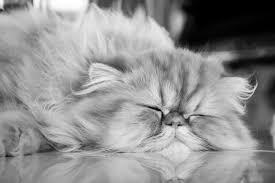

In [ ]:
# covert it to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

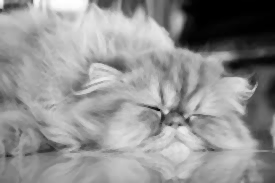

In [ ]:
# apply median filter
median = cv2.medianBlur(gray,3)
cv2_imshow(median)

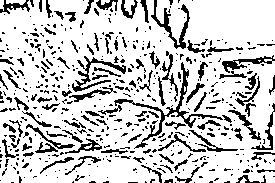

In [ ]:
laplacian = cv2.Laplacian(median,cv2.CV_16S, ksize=5)
retval, threshold = cv2.threshold(laplacian, 150, 255, cv2.THRESH_BINARY)
threshold = (255-threshold)
black = (-1*threshold)
sketch = np.array(threshold, dtype=np.uint8)
background = np.array(black, dtype=np.uint8)

gray_sketch = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
#height, width, channels = gray_sketch.shape 
#final_frame = cv2.hconcat((img,gray_sketch))
cv2_imshow(gray_sketch)
#cv2_imshow(background+ gray_sketch)

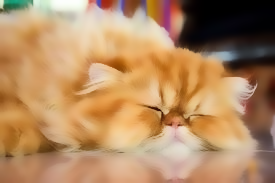

In [ ]:
im_bi = rescale_frame(image, 20)
# apply bilateral Filter
bi_ksize = 10
sigma = 40
im_bi = cv2.bilateralFilter(image, bi_ksize,100 , sigma+1000, sigma+200)
cv2_imshow(im_bi)

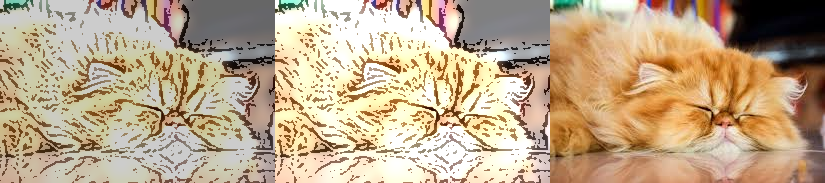

183 275


In [ ]:
# add all together
added_image = cv2.addWeighted(im_bi,0.8,gray_sketch,0.5,0)
backrgb = cv2.cvtColor(background,cv2.COLOR_GRAY2RGB)

final_touch = cv2.addWeighted(added_image, 0.8, backrgb, 0.1 ,0)
height, width, channels = image.shape 
img = np.zeros([height,width,3],dtype=np.uint8)
img.fill(50) # or img[:] = 255
#cv2_imshow(img)
final_frame = cv2.hconcat((final_touch, added_image, image))
cv2_imshow(final_frame)

print(height, width)

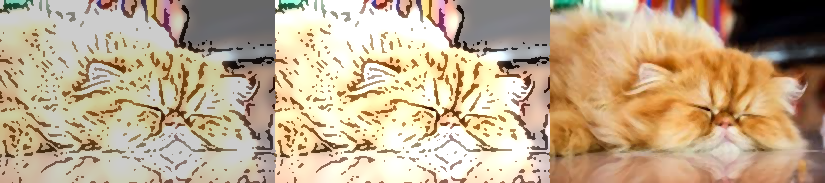

In [ ]:
median2 = cv2.medianBlur(final_frame,3)
median2 = cv2.medianBlur(final_frame,3)
cv2_imshow(median2)

In [ ]:

#alpha = 0.6 # Contrast control (1.0-3.0)
#beta = 50 # Brightness control (0-100)

#adjusted = cv2.convertScaleAbs(final_touch, alpha=alpha, beta=beta)
#final_frame = cv2.hconcat((final_touch, adjusted))


#cv2_imshow(final_frame)


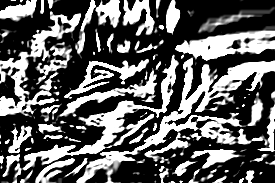

In [ ]:
sobelx = cv2.Sobel(median,cv2.CV_64F,1,0,ksize=5)   #x
sobely = cv2.Sobel(median,cv2.CV_64F,0,1,ksize=5)  # y
#cv2_imshow(np.concatenate(sobelx, sobely))
cv2_imshow(sobelx+sobely)

**Method I found**

In [ ]:
def cartoonise(self, img_rgb, num_down, num_bilateral, medianBlur, D, sigmaColor, sigmaSpace):
        # 用高斯金字塔降低取样
        img_color = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
        for _ in range(num_down):
            img_color = cv2.pyrDown(img_color)
        # 重复使用小的双边滤波代替一个大的滤波
        for _ in range(num_bilateral):
            img_color = cv2.bilateralFilter(img_color, d=D, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
        # 升采样图片到原始大小
        for _ in range(num_down):
            img_color = cv2.pyrUp(img_color)
        if not self.Save_Edge:
            img_cartoon = img_color
        else:
            img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
            img_blur = cv2.medianBlur(img_gray, medianBlur)
            img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY,
                                             blockSize=self.Adaptive_Threshold_Block_Size,
                                             C=self.C)
            img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
            img_edge = cv2.resize(img_edge, img_color.shape[:2][::-1])
            img_cartoon = cv2.bitwise_and(img_color, img_edge)
        return cv2.cvtColor(img_cartoon, cv2.COLOR_RGB2BGR) 